# Who are the top customers for the most profitable region ? ?

### Methodology

1. Filter dataset to include only **West** (most profitable region) customers
2. grouped by Customer ID
3. Rename column
4. Sort result by Total Profit descending
5. Get top 10 rows
6. Plot final findings

## Import Libraris and Data

In [17]:
# Importing libraris ill use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import humanize


# TODO : Loading the data
data = pd.read_csv('data/superstore.csv' , encoding='latin1')

## Data Cleaning

In [18]:

# TODO : Data Cleaning Phase + managing types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

col_to_categorize = ['Ship Mode' , 'Sub-Category' , 'Category' , 'Region' , 'Segment' , 'State']
for col in col_to_categorize:
    data[col] = data[col].astype('category')

# Treat duplicate rows
duplicated_sum = data.duplicated().sum()
if duplicated_sum > 0 :
    data.drop_duplicates(inplace=True)

most_occurent_ship_mode = data['Ship Mode'].mode()[0]
most_occurent_segment = data['Segment'].mode()[0]

data['Ship Mode'] = data['Ship Mode'].fillna(most_occurent_ship_mode)
data['Segment'] = data['Segment'].fillna(most_occurent_segment)

# Check if any discounts higher then 1
discount_higher_then_01 = (data['Discount'] > 1).sum()
if discount_higher_then_01 >= 1:
    print("Discount Higher then 1 founded and fixed")
    data['Discount'] = np.where(data['Discount'] > 1 , data['Discount'].median() , data['Discount'])


Discount Higher then 1 founded and fixed


## Engineering Features

In [19]:
# TODO : Engineering features
months = list(calendar.month_name)[1:]
data['Year'] = data['Order Date'].dt.strftime("%Y")
data['Month'] = data['Order Date'].dt.strftime("%B")
# Convert Month column to an ordered categorical type
data['Month'] = pd.Categorical(data['Month'] , categories=months , ordered=True)
data.set_index("Row ID" , inplace=True)


# Sort Columns
data.sort_values(by='Year' , ascending=False , inplace=True)

## The Analysis

First of all i used recent analysis (**most profitable region**) to get the meant region , then i filtered the dataset based on that value , i grouped the result by `Customer ID` including also `Customer Name` and `State` , i renamed the column to `Total Profit` just for readability purposes , then used `head()` to get the top 10 rows.

In [20]:
most_profitable_regions = data.groupby('Region' , observed=False)[[ 'Profit']].sum()
most_profitable_regions.rename(columns={'Profit':'Total Profit'} , inplace=True)
most_profitable_regions['Total Profit'] = round(most_profitable_regions['Total Profit']).astype(int)
most_profitable_regions.sort_values(by='Total Profit' , ascending=False , inplace=True)

In [21]:
most_prof_region = most_profitable_regions['Total Profit'].idxmax()
customers_rg = data[data['Region'] == most_prof_region]
profit_per_customers = customers_rg.groupby(['Customer ID' , 'Customer Name' , 'State'] , observed=True)[['Profit']].sum().astype(int).reset_index().set_index('Customer Name')
profit_per_customers.rename(columns={'Profit':'Total Profit'} , inplace=True)
profit_per_customers.sort_values(by='Total Profit' , ascending=False , inplace=True)
top_ten_profitable_customers = profit_per_customers.head(10)
top_ten_profitable_customers

,Customer ID,State,Total Profit
Customer Name,,,
Raymond Buch,RB-19360,Washington,6734
Jane Waco,JW-15220,California,2069
Fred Hopkins,FH-14365,Washington,1930
Dennis Pardue,DP-13390,Nevada,1691
Robert Marley,RM-19675,California,1598
Alan Dominguez,AD-10180,Montana,1455
Yana Sorensen,YS-21880,Washington,1255
Joseph Holt,JH-15985,Washington,1076
Gary Hwang,GH-14425,Washington,1073


## Plotting

Created a column chart to visualize the top 10 most profitable west customers

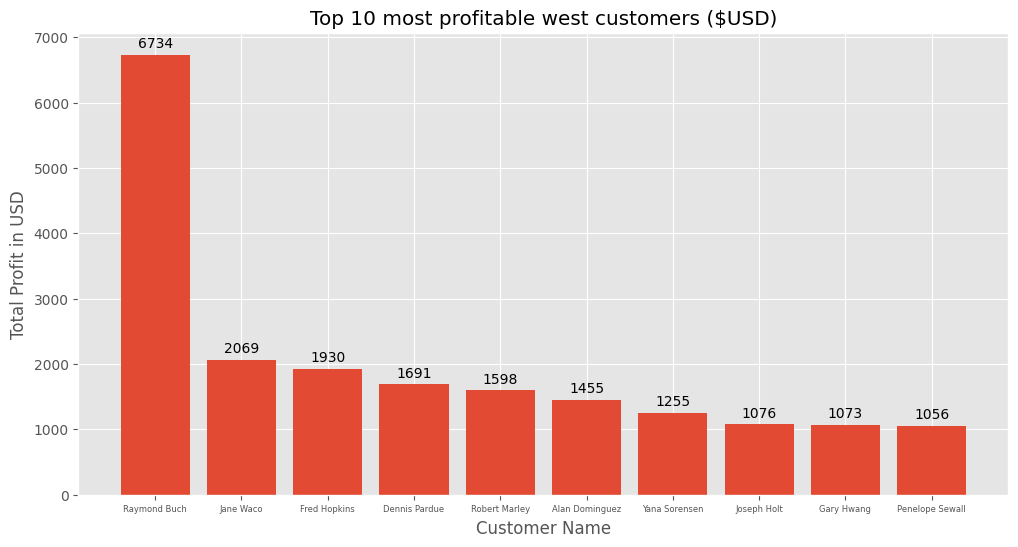

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
top_ten_prof_orders_bars = plt.bar(top_ten_profitable_customers.index , top_ten_profitable_customers['Total Profit'])
plt.bar_label(top_ten_prof_orders_bars , label_type='edge' , padding=3)
plt.xticks(fontsize=6)
plt.xlabel("Customer Name")
plt.ylabel("Total Profit in USD")
plt.title("Top 10 most profitable west customers ($USD)")
plt.savefig("figures/question_5_fig.png") 
plt.show()